In [1]:
import numpy as np
n_array = np.arange(10).reshape(2,5)
n_array

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [2]:
n_array.ndim

2

In [3]:
n_array.shape

(2, 5)

In [6]:
import torch
t_array = torch.FloatTensor(n_array)
t_array    #numpy의 array와 유사한 tensor

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

In [7]:
t_array.ndim

2

In [10]:
t_array.shape

torch.Size([2, 5])

In [12]:
type(t_array)

torch.Tensor

#### Tensor operations

In [9]:
n1 = np.arange(10).reshape(2,5)
n2 = np.arange(10).reshape(5,2)

In [15]:
t_array[1:]
t_array[:2,:3]

tensor([[0., 1., 2.],
        [5., 6., 7.]])

In [17]:
t1 = torch.FloatTensor(n1)
t2 = torch.FloatTensor(n2)
print(t1.shape)
print(t2.shape)
print(t1.matmul(t2))    #2*5 dot 5*2 => 2*2

torch.Size([2, 5])
torch.Size([5, 2])
tensor([[ 60.,  70.],
        [160., 195.]])


In [20]:
n1.dot(n2)

array([[ 60,  70],
       [160, 195]])

In [21]:
n1 = np.arange(4).reshape(2,2)
n2 = np.arange(4).reshape(2,2)
t1 = torch.FloatTensor(n1)
t2 = torch.FloatTensor(n2)

t1*t2

tensor([[0., 1.],
        [4., 9.]])

In [22]:
t1.mul(t2)

tensor([[0., 1.],
        [4., 9.]])

In [23]:
t1*5

tensor([[ 0.,  5.],
        [10., 15.]])

In [24]:
t1.mean()

tensor(1.5000)

In [26]:
t1.mean(dim=1)    #numpy의 axis

tensor([0.5000, 2.5000])

In [27]:
n1 = np.arange(10)
t1 = torch.FloatTensor(n1)
t1.view(-1,2)    #-1은 전체값, 2는 컬럼 두개

tensor([[0., 1.],
        [2., 3.],
        [4., 5.],
        [6., 7.],
        [8., 9.]])

In [29]:
t1.view(-1,10)

tensor([[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]])

In [28]:
t1.view(-1,10).squeeze()    #rank를 줄이는거

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [33]:
t1.view(-1,10).unsqueeze(dim=1)

tensor([[[0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]]])

In [34]:
import torch
import torch.nn.functional as F

In [35]:
tensor = torch.FloatTensor([0.5,0.7,0.1])
h_tensor = F.softmax(tensor,dim=0)
h_tensor

tensor([0.3458, 0.4224, 0.2318])

In [38]:
y = torch.randint(5,(10,5))
y_label = y.argmax(dim=1)

In [39]:
y_label

tensor([2, 3, 4, 0, 0, 4, 2, 3, 3, 4])

In [40]:
y

tensor([[1, 0, 3, 1, 2],
        [4, 3, 4, 4, 0],
        [2, 0, 1, 2, 3],
        [4, 3, 1, 2, 3],
        [2, 1, 0, 1, 1],
        [0, 2, 0, 0, 4],
        [2, 1, 4, 3, 1],
        [0, 2, 2, 4, 3],
        [2, 2, 2, 3, 0],
        [2, 0, 3, 2, 4]])

In [41]:
F.one_hot(y_label)

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]])

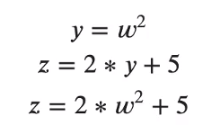

In [42]:
w = torch.tensor(2.0,requires_grad=True)    #자동미분(gradient를 할지 말지)

In [43]:
y = w**2
z = 2*y +5

In [46]:
z.backward()    #미분이 일어남

In [47]:
w.grad    #미분값 표시.. 

tensor(8.)

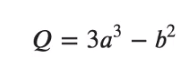

In [48]:
a = torch.tensor([2., 3.], requires_grad = True)
b = torch.tensor([6.,4.],requires_grad = True)
Q = 3*a**3 - b**2

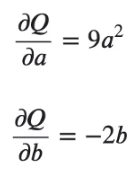

In [50]:
external_grad = torch.tensor([1.,1.])    #dQ를 1,1로???
Q.backward(gradient=external_grad)

In [51]:
a.grad

tensor([36., 81.])

In [52]:
b.grad

tensor([-12.,  -8.])